# Projet Machine Learning (Linéaire et Lasso)

In [1]:
%%time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats

Wall time: 1.19 s


In [2]:
df=pd.read_csv("SmplHDataset.csv",index_col=0)

### Visualisons notre DataFrame

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
pd.options.display.float_format = '{:.3f}'.format
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


###  Pour commencer, commençons par observer la répartition des ventes par rapport à la répartition normale

C:\Users\Aziz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Frequency')

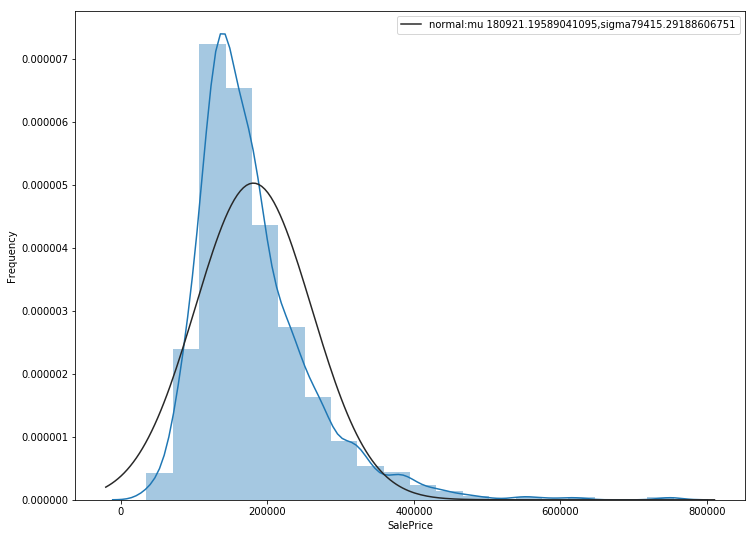

In [6]:
plt.subplots(figsize=(12,9))
sb.distplot(df["SalePrice"], fit=stats.norm,bins=20)
(mu,sigma)=stats.norm.fit(df["SalePrice"])
plt.legend(["normal:mu {},sigma{}".format(mu, sigma)])
plt.ylabel("Frequency")

### La courbe est "right-skimmed", certaines maisons sont particulièrement chères. Observons la Qualité générale du logement comparément au Prix de vente.

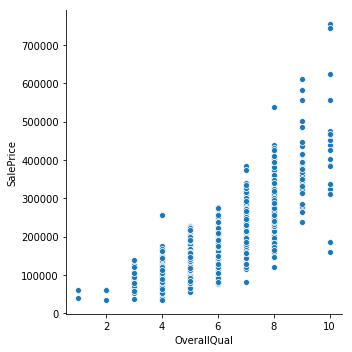

In [7]:
sb.relplot(x="OverallQual",y="SalePrice",data=df)

### Regardons maintenant les coefficients de corrélation des différentes variables avec le prix de vente et classons les.

In [8]:
corr2=df.corr()

In [9]:
corr2.SalePrice.sort_values()

KitchenAbvGr    -0.136
EnclosedPorch   -0.129
MSSubClass      -0.084
OverallCond     -0.078
YrSold          -0.029
LowQualFinSF    -0.026
MiscVal         -0.021
BsmtHalfBath    -0.017
BsmtFinSF2      -0.011
3SsnPorch        0.045
MoSold           0.046
PoolArea         0.092
ScreenPorch      0.111
BedroomAbvGr     0.168
BsmtUnfSF        0.214
BsmtFullBath     0.227
LotArea          0.264
HalfBath         0.284
OpenPorchSF      0.316
2ndFlrSF         0.319
WoodDeckSF       0.324
LotFrontage      0.352
BsmtFinSF1       0.386
Fireplaces       0.467
MasVnrArea       0.477
GarageYrBlt      0.486
YearRemodAdd     0.507
YearBuilt        0.523
TotRmsAbvGrd     0.534
FullBath         0.561
1stFlrSF         0.606
TotalBsmtSF      0.614
GarageArea       0.623
GarageCars       0.640
GrLivArea        0.709
OverallQual      0.791
SalePrice        1.000
Name: SalePrice, dtype: float64

###  Nous allons maintenant chercher à retirer du DataFrame les colonnes comportant trop de NaN

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [11]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 30


In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df2=df.dropna(axis=1)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non

### Nous passons de 80 à 61 colonnes... C'est un peu trop, cherchons plutôt à ne retirer que les colonnes qui comptent une proportion considérable de valeurs NaN.


In [15]:
Isnull= df.isnull().sum()/len(df)*100

In [16]:
Isnull.sort_values(ascending=False)

PoolQC          99.521
MiscFeature     96.301
Alley           93.767
Fence           80.753
FireplaceQu     47.260
LotFrontage     17.740
GarageType       5.548
GarageCond       5.548
GarageFinish     5.548
GarageQual       5.548
GarageYrBlt      5.548
BsmtFinType2     2.603
BsmtExposure     2.603
BsmtQual         2.534
BsmtCond         2.534
                 ...  
KitchenAbvGr     0.000
BedroomAbvGr     0.000
HalfBath         0.000
FullBath         0.000
BsmtHalfBath     0.000
BsmtFullBath     0.000
GrLivArea        0.000
LowQualFinSF     0.000
2ndFlrSF         0.000
1stFlrSF         0.000
CentralAir       0.000
SaleCondition    0.000
Heating          0.000
TotalBsmtSF      0.000
MSSubClass       0.000
Length: 80, dtype: float64

## Pour rester pertinent, il nous faut donc dropper les colonnes qui comptent plus de 17,7% de valeurs NaN, c'est à dire ne garder que les colonnes qui comptent au moins 82,3% de la taille du Dataset (1202 lignes)

In [17]:
df2=df.dropna(axis=1,thresh=1202)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non

## Nous séparons les variables qualitatives des variables quantitatives

In [19]:
dfnumerique=df2.select_dtypes(include=["float64","int64"])

In [20]:
dfnumerique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1379 non-null float64
G

In [21]:
Categorical=df2.select_dtypes(include=["object"])

In [22]:
Categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 38 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422 non-null object
BsmtFinType1     14

In [23]:
# Une autre manière de faire:
# Categorical = df.loc[:,(set(df2)-set(dfnumerique))]

### Analysons maintenant la corrélation des variables quantitatives avec SalePrice

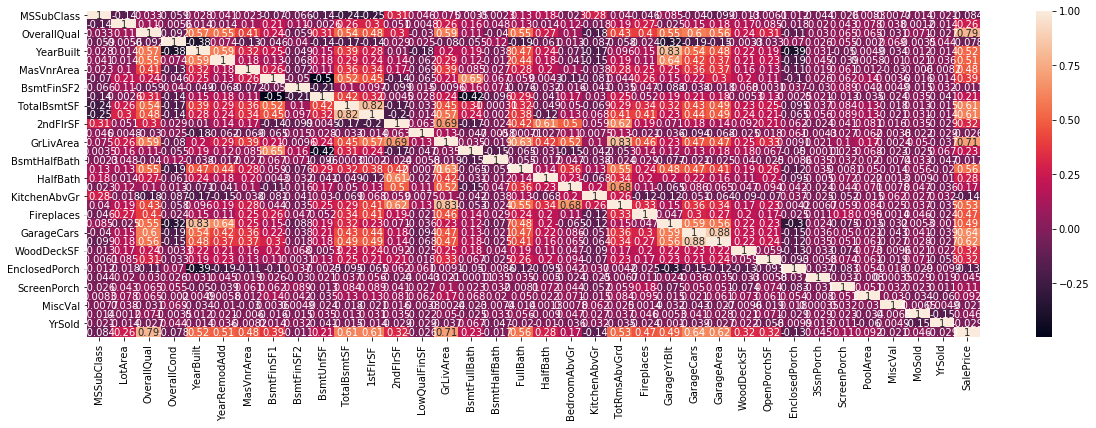

In [24]:
corr=dfnumerique.corr()
plt.figure(figsize=(20,6))
sb.heatmap(corr,annot=True)


### Retenons les corrélations supérieures à 0.5 en valeur absolue

In [25]:
top_feature=corr.index[abs(corr["SalePrice"])>0.5]

In [26]:
top_feature
top_corr=df2[top_feature].corr()

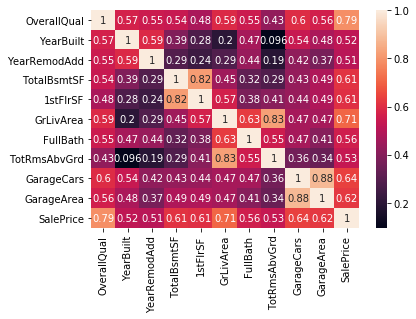

In [27]:
sb.heatmap(top_corr,annot=True)

## Machine Learning
### En utilisant Sklearn, nous allons centrer et réduire les variables quantitatives 

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
type(top_feature)

pandas.core.indexes.base.Index

In [30]:
top_feature

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [31]:
dftop=df2[top_feature]

In [32]:
dftop.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,208500
2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
3,7,2001,2002,920,920,1786,2,6,2,608,223500
4,7,1915,1970,756,961,1717,1,7,3,642,140000
5,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [33]:
target=pd.DataFrame(df2.SalePrice,columns=["SalePrice"])

In [34]:
target.head()

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000


In [35]:
df3=df2.fillna(df2.median())

In [36]:
df2.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [37]:
dftrain=df3.drop(columns=["SalePrice"])

In [38]:
dftrain.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [39]:
X=dftrain
y=target["SalePrice"]

### Encodons maintenant les variables qualitatives

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
cols=Categorical.columns.tolist()

In [43]:
cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [44]:
for c in cols:
    le.fit(list(dftrain[c].values))
    dftrain[c]=le.transform(list(dftrain[c].values))

In [45]:
dftrain

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.000,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.000,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.000,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.000,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.000,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4
6,50,3,14115,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.000,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,1,1993.000,2,2,480,4,4,2,40,30,0,320,0,0,700,10,2009,8,4
7,20,3,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.000,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,1,2004.000,1,2,636,4,4,2,255,57,0,0,0,0,0,8,2007,8,4
8,60,3,10382,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.000,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,1,1973.000,1,2,484,4,4,2,235,204,228,0,0,0,350,11,2009,8,4
9,50,4,6120,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.000,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,5,1931.000,2,2,468,1,4,2,90,0,205,0,0,0,0,4,2008,8,0


In [46]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null int64
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null int64
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int64
RoofMatl         1460 non-null int64
Exterior1st      1460 non-null int64
Exterior2nd      1460 non-null int64
MasVnrType       1460 non-null int64
MasVnrArea       1460 non-null float64
Ext

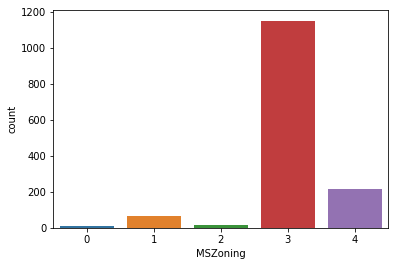

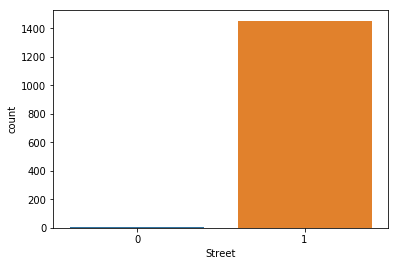

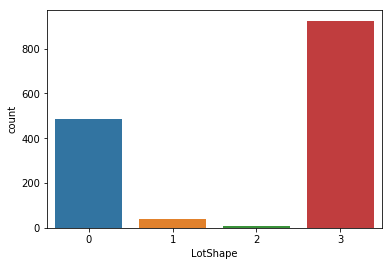

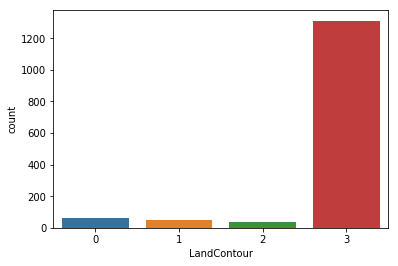

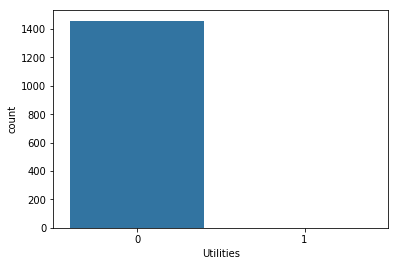

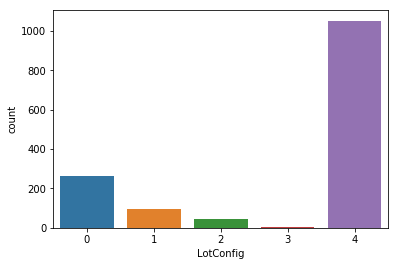

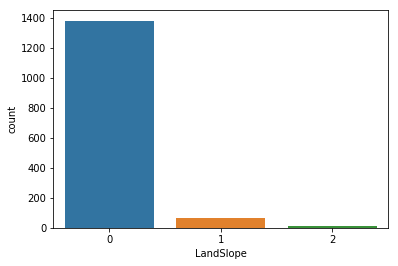

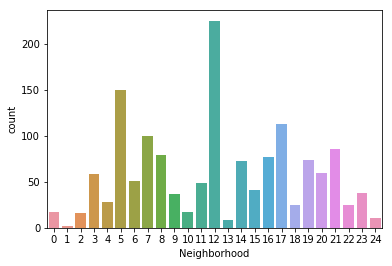

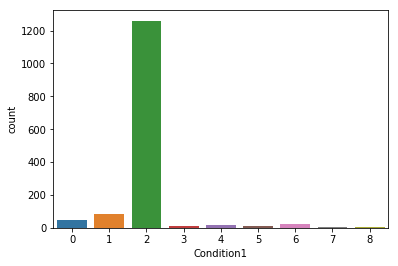

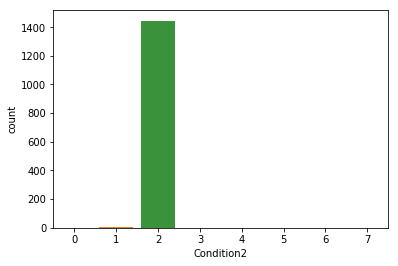

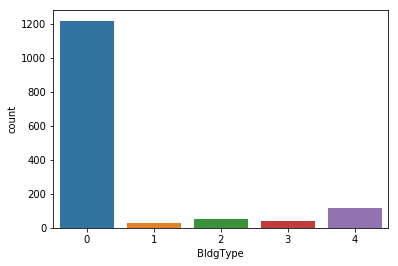

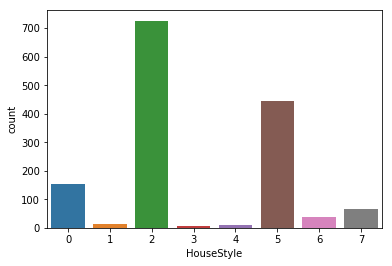

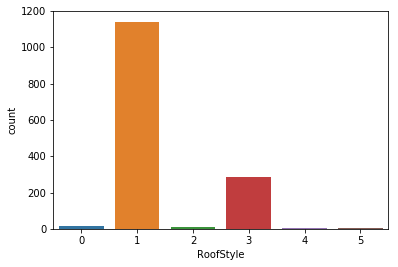

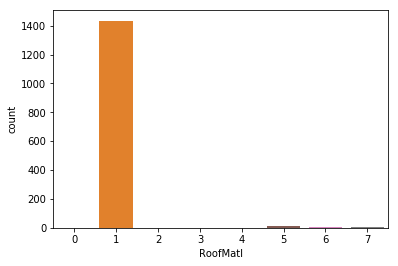

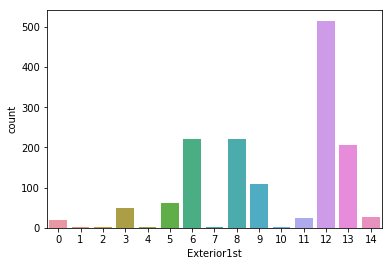

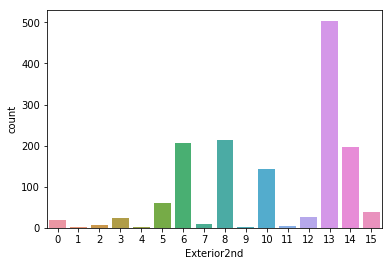

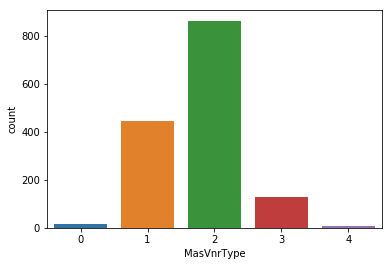

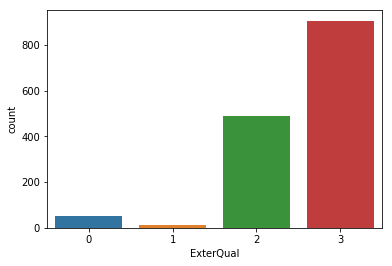

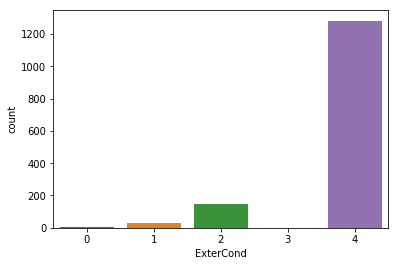

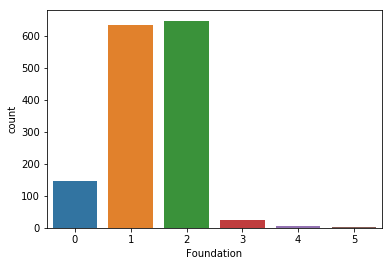

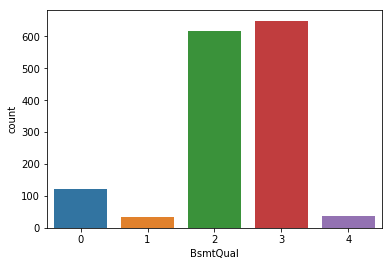

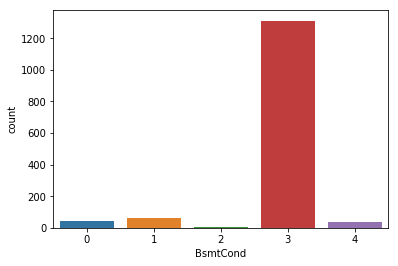

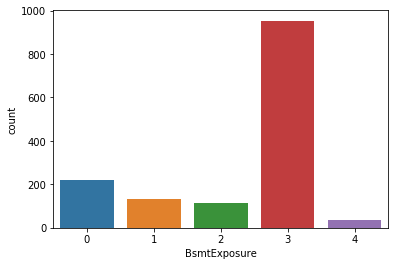

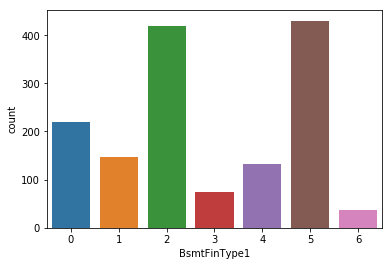

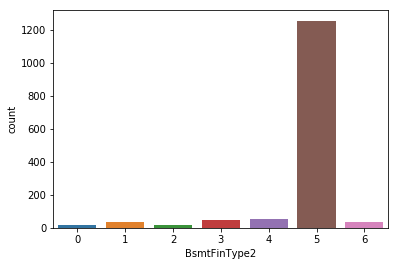

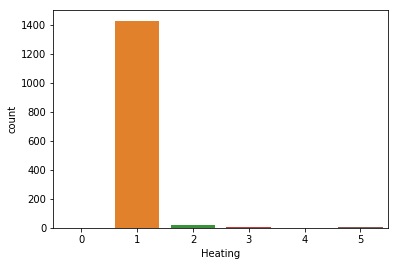

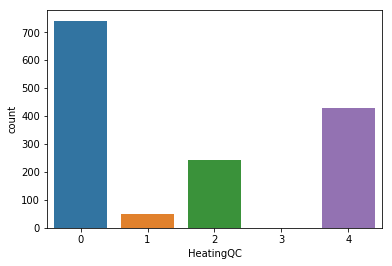

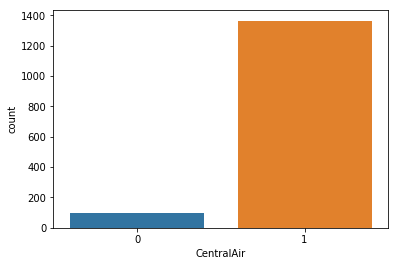

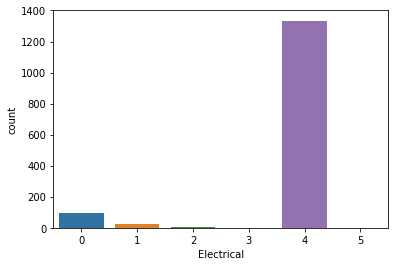

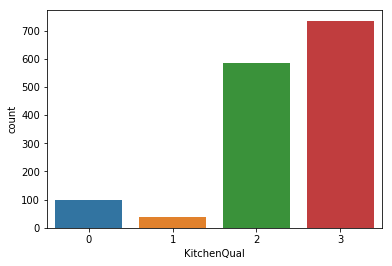

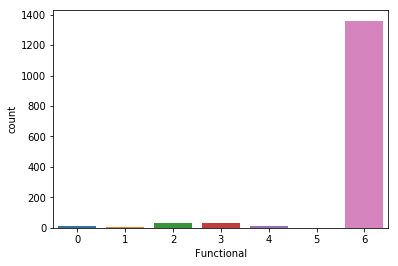

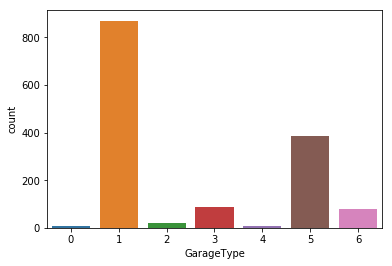

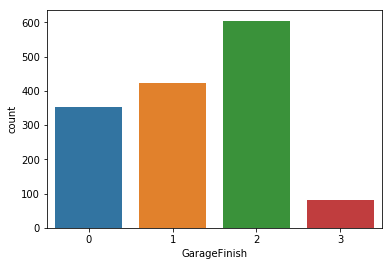

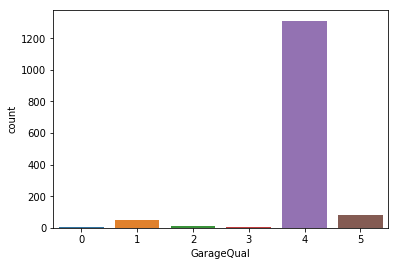

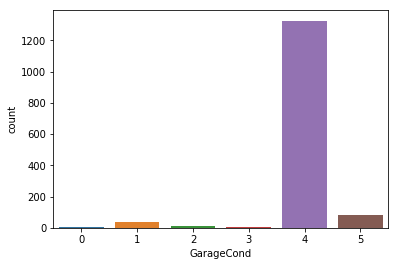

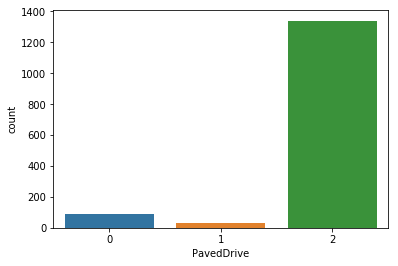

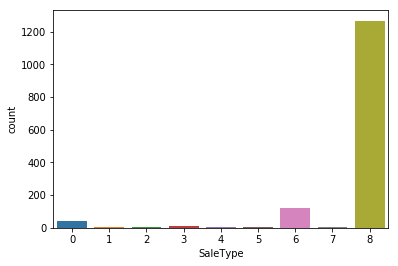

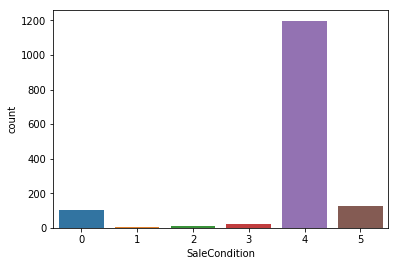

In [47]:
for c in cols:
    sb.countplot(c,data=dftrain)
    plt.show()

In [48]:
dftrain.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.000,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.000,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.000,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.000,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.000,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4


In [49]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.000,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.000,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.000,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.000,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.000,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4


In [50]:
sc=StandardScaler()
X2=sc.fit_transform(X)

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [51]:
len(X2)

1460

In [52]:
X2.std()

1.0

In [53]:
pd.DataFrame(X2,columns=dftrain.columns.values)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073,-0.046,-0.207,0.064,0.751,0.315,-0.026,0.605,-0.226,-1.206,-0.036,-0.032,-0.412,1.027,0.651,-0.517,1.051,0.879,-0.492,-0.126,0.743,0.752,-1.216,0.514,-0.778,0.364,0.836,-0.340,0.233,0.592,-0.435,0.575,0.273,-0.289,-0.945,-0.459,-0.123,-0.885,0.264,0.302,-0.793,1.162,-0.120,0.370,1.108,-0.241,0.790,1.228,0.164,-0.211,-0.409,0.912,0.256,-0.951,-0.769,1.018,-0.318,0.312,0.351,0.112,0.069,0.290,-0.752,0.217,-0.359,-0.116,-0.270,-0.069,-0.088,-1.599,0.139,0.314,0.209
1,-0.873,-0.046,-0.092,0.064,0.751,0.315,-0.026,-0.628,-0.226,1.954,-1.188,-0.032,-0.412,-0.543,-0.072,2.180,0.157,-0.430,-0.492,-0.126,-0.508,-0.661,0.357,-0.571,0.663,0.364,-0.549,-0.340,0.233,-1.124,-1.502,1.172,0.273,-0.289,-0.641,0.466,-0.123,-0.885,0.264,0.302,0.257,-0.795,-0.120,-0.483,-0.820,3.949,0.790,-0.762,0.164,-0.211,0.796,-0.319,0.256,0.600,-0.769,-0.108,-0.318,0.312,-0.061,0.112,0.069,0.290,1.626,-0.704,-0.359,-0.116,-0.270,-0.069,-0.088,-0.489,-0.614,0.314,0.209
2,0.073,-0.046,0.073,0.064,-1.379,0.315,-0.026,0.605,-0.226,-1.206,-0.036,-0.032,-0.412,1.027,0.651,-0.517,0.985,0.830,-0.492,-0.126,0.743,0.752,-1.216,0.326,-0.778,0.364,0.836,-0.340,0.233,-0.266,-0.435,0.093,0.273,-0.289,-0.302,-0.313,-0.123,-0.885,0.264,0.302,-0.628,1.189,-0.120,0.515,1.108,-0.241,0.790,1.228,0.164,-0.211,-0.409,-0.319,0.256,0.600,-0.769,0.934,-0.318,0.312,0.632,0.112,0.069,0.290,-0.752,-0.070,-0.359,-0.116,-0.270,-0.069,-0.088,0.991,0.139,0.314,0.209
3,0.310,-0.046,-0.097,0.064,-1.379,0.315,-0.026,-1.861,-0.226,-1.040,-0.036,-0.032,-0.412,1.027,0.651,-0.517,-1.864,-0.720,-0.492,-0.126,1.056,1.317,0.357,-0.571,0.663,0.364,-1.934,0.773,-2.724,0.592,-1.502,-0.499,0.273,-0.289,-0.062,-0.687,-0.123,0.265,0.264,0.302,-0.522,0.937,-0.120,0.384,1.108,-0.241,-1.026,-0.762,0.164,-0.211,-0.409,0.297,0.256,0.600,1.301,0.809,0.802,1.650,0.791,0.112,0.069,0.290,-0.752,-0.176,4.093,-0.116,-0.270,-0.069,-0.088,-1.599,-1.368,0.314,-3.426
4,0.073,-0.046,0.375,0.064,-1.379,0.315,-0.026,-0.628,-0.226,0.457,-0.036,-0.032,-0.412,1.027,1.375,-0.517,0.952,0.733,-0.492,-0.126,0.743,0.752,-1.216,1.366,-0.778,0.364,0.836,-0.340,0.233,-1.983,-0.435,0.464,0.273,-0.289,-0.175,0.200,-0.123,-0.885,0.264,0.302,-0.046,1.618,-0.120,1.299,1.108,-0.241,0.790,1.228,1.390,-0.211,-0.409,1.528,0.256,0.600,-0.769,0.893,-0.318,1.650,1.698,0.112,0.069,0.290,0.780,0.564,-0.359,-0.116,-0.270,-0.069,-0.088,2.101,0.139,0.314,0.209
5,-0.163,-0.046,0.361,0.064,-1.379,0.315,-0.026,0.605,-0.226,-0.208,-0.036,-0.032,-0.412,-1.590,-0.795,-0.517,0.720,0.491,-0.492,-0.126,0.743,0.752,0.357,-0.571,0.663,0.364,4.990,-0.340,0.233,0.592,-0.435,0.632,0.273,-0.289,-1.139,-0.596,-0.123,-0.885,0.264,0.302,-0.949,0.502,-0.120,-0.292,1.108,-0.241,-1.026,1.228,-2.289,-0.211,0.796,-0.934,0.256,-0.951,-0.769,0.601,0.802,0.312,0.033,0.112,0.069,0.290,-0.433,-0.252,-0.359,10.802,-0.270,-0.069,1.324,1.361,0.892,0.314,0.209
6,-0.873,-0.046,-0.043,0.064,0.751,0.315,-0.026,0.605,-0.226,1.455,-0.036,-0.032,-0.412,-0.543,1.375,-0.517,1.084,0.976,-0.492,-0.126,0.743,0.752,1.930,0.459,-0.778,0.364,0.836,-2.565,0.233,-1.983,-0.435,2.030,0.273,-0.289,-0.567,1.433,-0.123,-0.885,0.264,0.302,1.375,-0.795,-0.120,0.340,1.108,-0.241,0.790,-0.762,0.164,-0.211,-0.409,0.297,0.256,0

In [54]:
import sklearn.model_selection as skm
X2_train, X2_test, y2_train,y2_test=skm.train_test_split(X2,y,train_size=0.70,random_state=0)

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
import sklearn.model_selection as skm
X2_train, X2_test, y_train,y_test=skm.train_test_split(X2,y,train_size=0.70,random_state=0)

In [56]:
Xc=sm.add_constant(X)
X2c=sm.add_constant(X2)

In [57]:
model=sm.OLS(y,X2c).fit()
model.predict(X2c)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:51:51   Log-Likelihood:                -17163.
No. Observations:                1460   AIC:                         3.447e+04
Df Residuals:                    1388   BIC:                         3.485e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.809e+05    828.044    218.492      0.000    1.79e+05    1.83e+05
x1         -5250.3071   1910.500     -2.748      0.006   -8998.086   -1502.529
x2          -488.9148    952.786     -0.513      0.608   -2357.971    1380.141
x3          3678.5900   1050.458      3.502      0.000    1617.933    5739.247
x4          2000.7838    889.202      2.250      0.025     256.458    3745.109
x5         -1405.2511    927.313     -1.515      0.130   -3224.337     413.834
x6          2775.3219    946.478      2.932      0.003     918.641    4632.003
x7         -1338.3426    866.211     -1.545      0.123   -3037.566     360.881
x8           213.9211    878.264      0.244      0.808   -1508.946    1936.789
x9          1642.2752   1053.622      1.559      0.119    -424.588    3709.139
x10         2303.4720    929.349      2.479      0.013     480.392    4126.552
x11         -518.5369    875.802     -0.592      0.554   -2236.575    1199.501
x12        -2386.3903    866.593     -2.754      0.006   -4086.363    -686.417
x13        -1841.5917   1764.937     -1.043      0.297   -5303.823    1620.640
x14        -2476.0470   1242.813     -1.992      0.047   -4914.042     -38.052
x15         1.566e+04   1631.961      9.595      0.000    1.25e+04    1.89e+04
x16         5044.2986   1159.016      4.352      0.000    2770.686    7317.911
x17         6735.0405   2343.237      2.874      0.004    2138.372    1.13e+04
x18          809.9050   1395.535      0.580      0.562   -1927.680    3547.490
x19         1824.4255    935.458      1.950      0.051     -10.638    3659.489
x20         2813.8420    896.828      3.138      0.002    1054.558    4573.126
x21        -3134.3311   1658.557     -1.890      0.059   -6387.881     119.218
x22         1037.5694   1661.216      0.625      0.532   -2221.196    4296.335
x23         2772.8687    969.126      2.861      0.004     871.760    4673.978
x24         5544.3480   1100.505      5.038      0.000    3385.515    7703.181
x25        -6446.2973   1357.097     -4.750      0.000   -9108.480   -3784.115
x26          398.4718    916.502      0.435      0.664   -1399.407    2196.350
x27         1265.0051   1199.333      1.055      0.292   -1087.697    3617.707
x28        -7516.2130   1270.680     -5.915      0.000      -1e+04   -5023.553
x29         1742.2347    911.332      1.912      0.056     -45.501    3529.971
x30        -4213.2472   1030.260     -4.089      0.000   -6234.282   -2192.213
x31        -1453.2053   1164.395     -1.248      0.212   -3737.369     830.958
x32         1985.2031   1052.320      1.887      0.059     -79.107    4049.513
x33          968.3563   1284.202      0.754      0.451   -1550.831    3487.543
x34         1296.6586   1237.754      1.048      0.295   -1131.412    3724.729
x35        -1574.2289    876.842     -1.795      0.073   -3294.307     145.849
x3

In [58]:
X_train, X_test, y_train,y_test=skm.train_test_split(X2,y,train_size=0.70,random_state=0)
X2_train, X2_test, y2_train,y2_test=skm.train_test_split(X2c,y,train_size=0.70,random_state=0)


In [59]:
model=sm.OLS(y_train,X_train).fit()
model.predict(X_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.573
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           1.72e-10
Time:                        13:51:51   Log-Likelihood:                -13805.
No. Observations:                1021   AIC:                         2.775e+04
Df Residuals:                     950   BIC:                         2.810e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -8842.5497   1.38e+04     -0.640      0.522    -3.6e+04    1.83e+04
x2         -1452.4620   6860.273     -0.212      0.832   -1.49e+04     1.2e+04
x3          3717.6201   7285.688      0.510      0.610   -1.06e+04     1.8e+04
x4          -105.0912   5869.068     -0.018      0.986   -1.16e+04    1.14e+04
x5         -1697.0236   6584.262     -0.258      0.797   -1.46e+04    1.12e+04
x6          8941.0275   7030.627      1.272      0.204   -4856.327    2.27e+04
x7          2050.2558   5233.849      0.392      0.695   -8220.986    1.23e+04
x8          4374.9042   6355.310      0.688      0.491   -8097.164    1.68e+04
x9          4828.8275   7440.071      0.649      0.516   -9772.045    1.94e+04
x10          814.6767   6619.386      0.123      0.902   -1.22e+04    1.38e+04
x11         2279.3827   6272.179      0.363      0.716      -1e+04    1.46e+04
x12        -4.206e+04    1.2e+04     -3.517      0.000   -6.55e+04   -1.86e+04
x13         6292.5432   1.27e+04      0.497      0.619   -1.85e+04    3.11e+04
x14        -6647.1496   9095.936     -0.731      0.465   -2.45e+04    1.12e+04
x15         5730.2507   1.17e+04      0.490      0.624   -1.72e+04    2.87e+04
x16         3935.3333   8002.960      0.492      0.623   -1.18e+04    1.96e+04
x17         2.038e+04   1.76e+04      1.161      0.246   -1.41e+04    5.48e+04
x18         1791.9346   1.01e+04      0.177      0.859   -1.81e+04    2.16e+04
x19         3860.9830   6628.330      0.582      0.560   -9146.877    1.69e+04
x20         7996.1598   5882.892      1.359      0.174   -3548.805    1.95e+04
x21         2197.1614   1.22e+04      0.180      0.857   -2.17e+04    2.61e+04
x22         2880.3471   1.22e+04      0.236      0.814   -2.11e+04    2.68e+04
x23         1.322e+04   6845.109      1.932      0.054    -208.587    2.67e+04
x24         1.067e+04   7676.384      1.389      0.165   -4398.830    2.57e+04
x25         1649.5266   9660.547      0.171      0.864   -1.73e+04    2.06e+04
x26        -5397.1434   6380.752     -0.846      0.398   -1.79e+04    7124.854
x27         2786.8263   8473.966      0.329      0.742   -1.38e+04    1.94e+04
x28        -4253.8639   9227.794     -0.461      0.645   -2.24e+04    1.39e+04
x29         2430.2366   6415.699      0.379      0.705   -1.02e+04     1.5e+04
x30        -2590.8082   7296.780     -0.355      0.723   -1.69e+04    1.17e+04
x31         -882.6453   8561.234     -0.103      0.918   -1.77e+04    1.59e+04
x32         1.152e+04   8037.901      1.433      0.152   -4255.465    2.73e+04
x33        -7007.6043   8806.885     -0.796      0.426   -2.43e+04    1.03e+04
x34        -2297.0429   8893.491     -0.258      0.796   -1.98e+04    1.52e+04
x35        -3020.3922   6256.221     -0.483      0.629   -1.53e+04    9257.218
x36         8088.4715   9466.877      0.854      0.393   -1.05e+04    2.67e+04
x3

# Lasso

In [60]:
from sklearn.linear_model import Lasso

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    dfl = pd.DataFrame()
    
    # Create a column of feature names
    dfl['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X_train, y_train)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        dfl[column_name] = lasso.coef_
        
    # Return the datafram    
    return dfl

In [61]:
names= X.columns.values

In [62]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 80
lasso([1000,10,0.001])

C:\Users\Aziz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,Feature Name,Alpha = 1000.000000,Alpha = 10.000000,Alpha = 0.001000
0,MSSubClass,-4644.851,-5093.055,-5074.908
1,MSZoning,-0.000,-425.430,-431.790
2,LotArea,5087.394,5812.115,5826.944
3,Street,1481.423,2454.379,2464.609
4,LotShape,-128.517,-387.690,-398.488
5,LandContour,524.746,1669.775,1682.938
6,Utilities,-82.495,-1104.867,-1114.227
7,LotConfig,-0.000,212.026,235.361
8,LandSlope,0.000,-236.534,-259.391
9,Neighborhood,0.000,622.401,633.761


In [63]:
import sklearn.linear_model as skl


reg= skl.LinearRegression().fit(X_train,y_train)
Lasso1= skl.Lasso(alpha=1000).fit(X_train,y_train)
Lasso2= skl.Lasso(alpha=0.01).fit(X_train,y_train)
Lasso3= skl.Lasso(alpha=0.001).fit(X_train,y_train)

In [64]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

print(Lasso1.score(X_train,y_train))
print(Lasso1.score(X_test,y_test))
print(Lasso2.score(X_train,y_train))
print(Lasso2.score(X_test,y_test))
print(Lasso3.score(X_train,y_train))
print(Lasso3.score(X_test,y_test))

0.8841131735012919
0.682496087203297
0.8755218143786179
0.7372768287330682
0.8841129886537563
0.6825644078078966
0.8841129886560597
0.6825636338598954


In [65]:
X_train

array([[ 1.49228154, -0.04553194, -0.76467687, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-0.87256276, -0.04553194, -0.33171769, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [-0.16310947, -0.04553194, -0.14600627, ...,  0.8919936 ,
         0.31386709,  0.2085023 ],
       ...,
       [ 0.78282825,  1.53724502, -0.15903513, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.49228154, -0.04553194, -0.73370826, ..., -1.36765473,
         0.31386709,  0.2085023 ],
       [ 0.07337496, -0.04553194,  0.62670559, ...,  1.64520971,
         0.31386709,  0.2085023 ]])

In [66]:
Lasso1.coef_

array([-4644.85068772,    -0.        ,  5087.39352498,  1481.42270032,
        -128.5168014 ,   524.74585377,   -82.49532894,    -0.        ,
           0.        ,     0.        ,  -485.19550887, -6802.07781505,
          -0.        ,    -0.        , 15210.10424766,  4611.29863031,
        5581.81577356,   857.44388897,  1066.19265344,  1386.55862982,
          -0.        ,     0.        ,  1763.73236535,  5342.39857964,
       -6531.77583196,     0.        ,  1248.01312759, -8015.15069407,
        1454.87688316, -1601.36452991,    -0.        ,  7466.03501101,
           0.        ,   692.12755312,    -0.        ,  3577.27226004,
          -0.        ,  -566.57653275,     0.        ,     0.        ,
        2543.57119841,     0.        ,   -56.06822155, 26260.6083422 ,
         638.9085337 ,    -0.        ,     0.        ,     0.        ,
          -0.        , -2072.86417659, -6624.64080811,  1152.88743389,
        3379.76934397,  3269.98231453,     0.        ,     0.        ,
      

In [67]:
np.quantile(np.abs(Lasso1.coef_),0.9)

5811.584870296703

In [68]:
np.sort(np.abs(Lasso1.coef_))

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
          56.06822155,    82.49532894,   108.78517867,   109.71202713,
         128.5168014 ,   217.01816269,   485.19550887,   524.74585377,
         566.57653275,   638.9085337 ,   692.12755312,   766.96675524,
         857.44388897,  1066.19265344,  1152.88743389,  1248.01312759,
        1386.55862982,  1454.87688316,  1481.42270032,  1563.70537694,
        1601.36452991,  1763.73236535,  2072.86417659,  2543.57119841,
      

In [69]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [70]:
df3.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [71]:
dftrain.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.000,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.000,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.000,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.000,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.000,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.000,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.000,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.000,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.000,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.000,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4


In [72]:
la1000=lasso([1000])

In [74]:
la1000.iloc[:,1].sort_values()

27   -8015.151
11   -6802.078
50   -6624.641
24   -6531.776
0    -4644.851
49   -2072.864
29   -1601.365
37    -566.577
10    -485.196
4     -128.517
70    -109.712
6      -82.495
42     -56.068
39       0.000
45      -0.000
46       0.000
47       0.000
38       0.000
41       0.000
54       0.000
71      -0.000
55       0.000
56      -0.000
59       0.000
61       0.000
63       0.000
64      -0.000
65       0.000
67       0.000
68       0.000
69      -0.000
48      -0.000
34      -0.000
36      -0.000
32       0.000
12      -0.000
9        0.000
8        0.000
7       -0.000
13      -0.000
21       0.000
20      -0.000
1       -0.000
30      -0.000
25       0.000
57     108.785
60     217.018
5      524.746
44     638.909
33     692.128
66     766.967
17     857.444
18    1066.193
51    1152.887
26    1248.013
19    1386.559
28    1454.877
3     1481.423
62    1563.705
22    1763.732
40    2543.571
72    3185.167
53    3269.982
52    3379.769
35    3577.272
15    4611.299
2     5087

In [75]:
la1000

,Feature Name,Alpha = 1000.000000
0,MSSubClass,-4644.851
1,MSZoning,-0.000
2,LotArea,5087.394
3,Street,1481.423
4,LotShape,-128.517
5,LandContour,524.746
6,Utilities,-82.495
7,LotConfig,-0.000
8,LandSlope,0.000
9,Neighborhood,0.000
